In [21]:

import pandas as pd

global_2020 = pd.read_csv("pvgis_2020_global.csv", skiprows=8, nrows=8784,
                          index_col=0)
components_2020 = pd.read_csv("pvgis_2020_components.csv", skiprows=8, nrows=8784,
                              index_col=0)

#print(global_2020)
#print(components_2020)


poa_data_2020 = pd.DataFrame(columns=['poa_global','poa_direct', 'poa_diffuse','temp_air' , 'wind_speed'],
                            index=global_2020.index)

poa_data_2020['poa_global'] = global_2020['G(i)']
poa_data_2020['poa_direct'] = components_2020['Gb(i)']
poa_data_2020['poa_diffuse'] = components_2020['Gd(i)'] + components_2020['Gr(i)']
poa_data_2020['temp_air'] = global_2020['T2m']
poa_data_2020['wind_speed'] = global_2020['WS10m']

poa_data_2020.index = pd.to_datetime(poa_data_2020.index, format="%Y%m%d:%H%M")
print(poa_data_2020)

#poa_data_2020.to_csv("poa_data_2020.csv")

                     poa_global  poa_direct  poa_diffuse  temp_air  wind_speed
time                                                                          
2020-01-01 00:10:00         0.0         0.0          0.0      1.82        3.10
2020-01-01 01:10:00         0.0         0.0          0.0      1.46        2.90
2020-01-01 02:10:00         0.0         0.0          0.0      1.05        2.97
2020-01-01 03:10:00         0.0         0.0          0.0      0.56        3.17
2020-01-01 04:10:00         0.0         0.0          0.0      0.20        3.10
...                         ...         ...          ...       ...         ...
2020-12-31 19:10:00         0.0         0.0          0.0      2.00        0.83
2020-12-31 20:10:00         0.0         0.0          0.0      2.09        0.90
2020-12-31 21:10:00         0.0         0.0          0.0      2.07        1.10
2020-12-31 22:10:00         0.0         0.0          0.0      1.82        1.24
2020-12-31 23:10:00         0.0         0.0         

In [18]:
!pip install pvlib

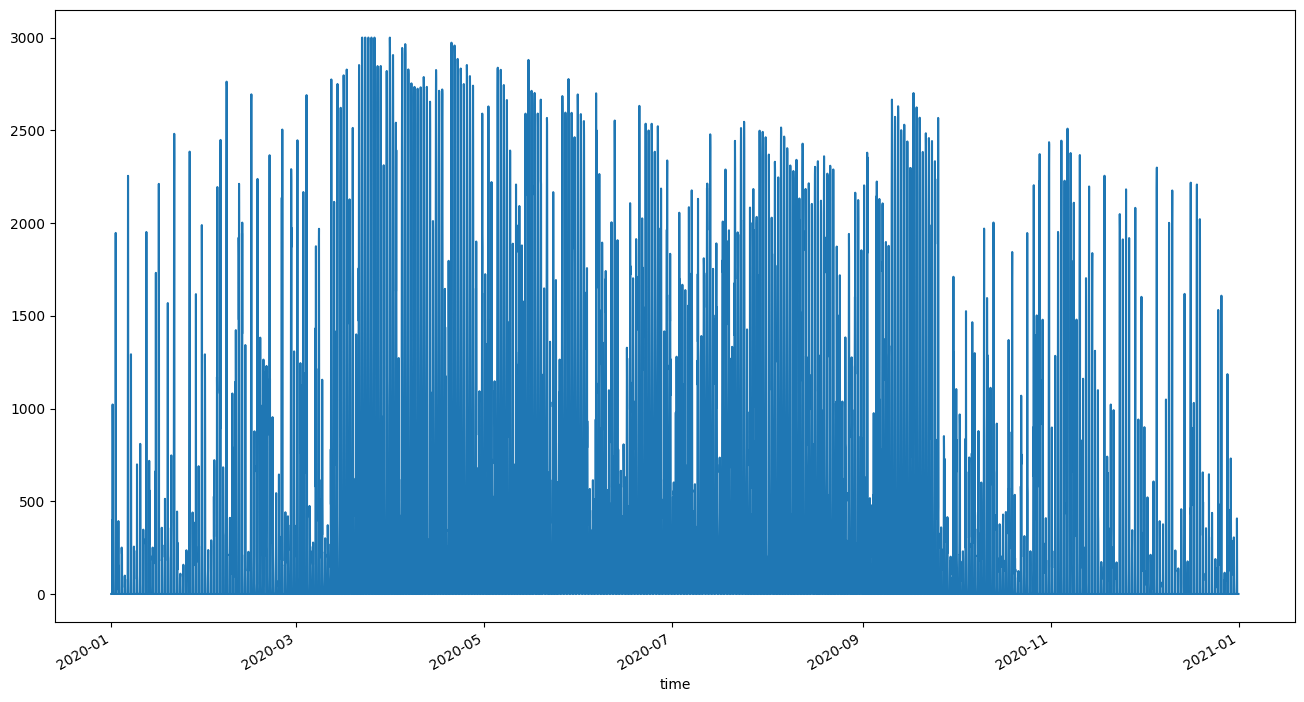

In [25]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import matplotlib.pyplot as plt
import pandas as pd

latitude = 50.941389
longitude = 6.958711

location = Location(latitude=latitude, longitude=latitude,
                    tz='Europe/Berlin', altitude=80, name='Cologne Cathedral')

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__PVI_3_0_OUTD_S_US__208V_']

temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt=45, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters,
                  modules_per_string= 7, strings_per_inverter= 2)

modelchain = ModelChain(system, location)

#times = pd.date_range(start="2021-07-01", end="2021-07-07",
#                     freq="1min", tz=location.tz)

#clear_sky = location.get_clearsky(times)

#modelchain.run_model(clear_sky)
#modelchain.results.ac.plot(figsize=(16,9))
#plt.title('Energy Yield [W]')
#plt.show()

poa_data_2020 = pd.read_csv("poa_data_2020.csv", index_col=0)

poa_data_2020.index = pd.to_datetime((poa_data_2020.index))

modelchain.run_model_from_poa(poa_data_2020)
modelchain.results.ac.plot(figsize=(16,9))
plt.show()
